In [8]:
# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import pandas as pd
from time import time


import numpy as np
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression as SK_LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

import config as cfg
from common import DataParser

from LinearRegression import LinearRegression

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
data, labels = DataParser.parse_moneyball(splitData=True)

In [10]:
cols_to_drop = ['Team', 'League', 'Year', 'RankSeason', 'RankPlayoffs', 'Playoffs']
df_prep = data.drop(cols_to_drop, axis=1)

# Fix missing values and type
df_prep.replace("?",0, inplace=True)
#df_prep = df_prep[df_prep.OOBP != 0]
df_prep[['OOBP','OSLG']] = df_prep[['OOBP','OSLG']].astype(float)

In [11]:
df = df_prep.dropna()
df

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,162,0.317,0.415
1,700,600,94,0.320,0.389,0.247,162,0.306,0.378
2,712,705,93,0.311,0.417,0.247,162,0.315,0.403
3,734,806,69,0.315,0.415,0.260,162,0.331,0.428
4,613,759,61,0.302,0.378,0.240,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...
415,872,831,86,0.356,0.434,0.271,162,0.345,0.423
416,809,838,75,0.338,0.426,0.262,161,0.355,0.427
417,772,913,69,0.343,0.411,0.274,162,0.371,0.448
418,945,859,95,0.361,0.479,0.293,162,0.346,0.459


In [12]:
labels = pd.DataFrame(df["W"]).to_numpy()
data = pd.DataFrame(df.drop("W", axis=1)).to_numpy()

#scaler = Normalizer()
scaler = MinMaxScaler((-1,1))
scaler.fit(data)
data = scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1 )

y_train = y_train.T[0]
y_test = y_test.T[0]

In [25]:
def benchmarkRegressor(reg, name):
    start_time = time()
    reg.fit(X_train,y_train)
    end_time = time()
    fit_time = end_time - start_time

    y_pred = reg.predict(X_test)


    print(f"R2 for {name}: {r2_score(y_test, y_pred)}, fit-time = {fit_time}")

alpha=0.0001
max_iter = 10000

sk_reg = SGDRegressor(alpha=alpha, max_iter=max_iter)
sk_lin = SK_LinearRegression()
ML2020_uniform = LinearRegression(alpha=alpha, max_iter=max_iter)
ML2020_residual = LinearRegression(alpha=alpha, max_iter=max_iter)

benchmarkRegressor(sk_reg, "SK SDG Regressor")
benchmarkRegressor(sk_lin, "SK Linear Regressor")
benchmarkRegressor(ML2020_uniform, "ML2020")

R2 for SK SDG Regressor: 0.8901989493793945, fit-time = 0.009000062942504883
R2 for SK Linear Regressor: 0.8943991725099895, fit-time = 0.0
R2 for ML2020 uniform: 0.8920666989279775, fit-time = 0.5279996395111084
R2 for ML2020 residual: 0.8920666989279775, fit-time = 0.5219998359680176


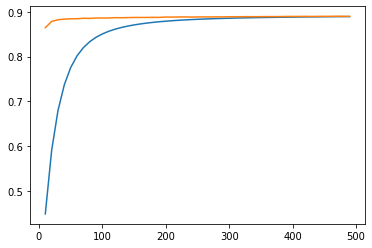

In [23]:
iter_vals = list(range(10,500,10))
alpha = 0.001 


plt.plot(iter_vals,[r2_score(y_test, LinearRegression(alpha=alpha, max_iter=max_iter).fit(X_train,y_train).predict(X_test)) for max_iter in iter_vals], label="ML2020 uniform")
plt.plot(iter_vals,[r2_score(y_test, SGDRegressor(max_iter=max_iter).fit(X_train,y_train).predict(X_test)) for max_iter in iter_vals], label="ML2020 residual")
plt.show()

